# PDF -> Txt 변환

In [1]:
# PDF -> TXT 변환 (PyMuPDF)
import sys, os
from pathlib import Path
import fitz  # PyMuPDF

raw_dir = Path("data/raw")
processed_dir = Path("data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

made = 0
for pdf_path in sorted(raw_dir.glob("*.pdf")):
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page in doc:
            text += page.get_text()
        out_path = processed_dir / (pdf_path.stem + ".txt")
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(text)
        made += 1
    except Exception as e:
        print(f"[WARN] {pdf_path.name}: {e}")

print(f"TXT 생성/갱신: {made}개 (processed 폴더: {len(list(processed_dir.glob('*.txt')))}개)")

MuPDF error: syntax error: invalid key in dict

MuPDF error: syntax error: invalid key in dict

TXT 생성/갱신: 100개 (processed 폴더: 100개)


# 실험 함수

In [11]:
# 1) 노트북 작업 폴더에 _vendor 디렉터리 만들고, 거기에 패키지 설치
import sys, pathlib
VENDOR = pathlib.Path.cwd() / "_vendor"
VENDOR.mkdir(exist_ok=True)

# 권한 문제 나는 site-packages 대신, 우리가 쓰기 권한 있는 _vendor 로 설치
!{sys.executable} -m pip install -U --no-warn-script-location --target "{VENDOR}" langchain-text-splitters

# 2) Python import 경로에 _vendor 추가
if str(VENDOR) not in sys.path:
    sys.path.insert(0, str(VENDOR))

# 3) 정상 가져오는지 확인
from langchain_text_splitters import RecursiveCharacterTextSplitter
print("OK:", RecursiveCharacterTextSplitter)

  Using cached langchain_text_splitters-1.0.0-py3-none-any.whl.metadata (2.6 kB)
Using cached langchain_text_splitters-1.0.0-py3-none-any.whl (33 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 57.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 152.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26/26 [langchain-text-splitters]in-core]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kubernetes 34.1.0 requires urllib3<2.4.0,>=1.24.2, but you have urllib3 2.5.0 which is incompatible.
OK: <class 'langchain_text_splitters.character.RecursiveCharacterTextSplitter'>


In [12]:
# src 경로 추가 + 함수 import
import sys
from pathlib import Path
sys.path.append(str(Path("src")))
from rag_rfp.prep.chunk_experiment import run_chunk_experiments

INPUT_DIR = "data/processed"
INTERIM   = Path("data/interim"); INTERIM.mkdir(parents=True, exist_ok=True)

# 실험 1

In [21]:
exp1_sizes    = [300, 500, 800, 1000]
exp1_overlaps = [0, 50, 100, 200]

df1 = run_chunk_experiments(
    input_dir=INPUT_DIR,
    output_path=str(INTERIM / "chunk_exp_300_1000.csv"),
    sizes=exp1_sizes,
    overlaps=exp1_overlaps,
)
df1["experiment"] = "exp1"
df1.head()

,chunk_size,overlap,chunk_count,avg_len,experiment
0,300,0,26267,280.336049,exp1
1,300,50,29890,281.130278,exp1
2,300,100,37131,281.157900,exp1
3,300,200,74075,281.487384,exp1
4,500,0,15403,479.738882,exp1


In [ ]:
"""
실험 1. 청크 크기를 [300, 500, 800, 1000]으로 두는 경우, 오버랩을 [0, 50, 100, 200] 로 테스트를 진행하였음.
"""


In [22]:
import matplotlib.pyplot as plt


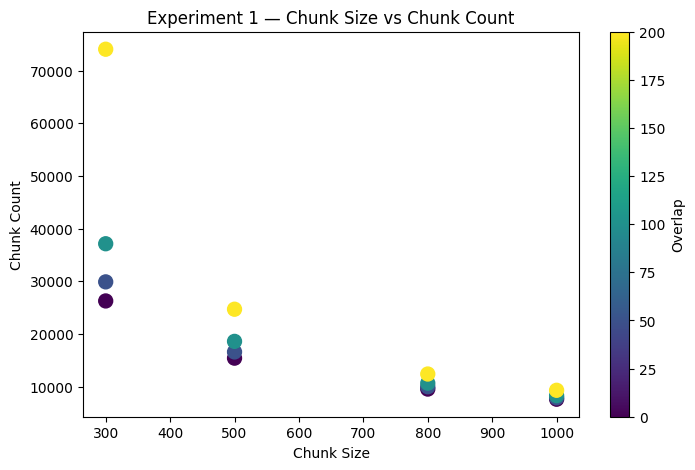

In [23]:
# ==== 시각화 1: Scatter (Chunk Size vs Chunk Count, 색=Overlap) ====
plt.figure(figsize=(8,5))
sc = plt.scatter(df1["chunk_size"], df1["chunk_count"], s=100, c=df1["overlap"], cmap="viridis")
cbar = plt.colorbar(sc)
cbar.set_label("Overlap")
plt.xlabel("Chunk Size")
plt.ylabel("Chunk Count")
plt.title("Experiment 1 — Chunk Size vs Chunk Count")
plt.show()

# 실험 2

In [24]:
OUT2 = "data/interim/chunk_exp_256_1024.csv"

sizes2 = [256, 384, 512, 768, 1024]
overlaps2 = [0, 32, 64, 96, 128]

df2 = run_chunk_experiments(INPUT_DIR, OUT2, sizes=sizes2, overlaps=overlaps2)
df2.head()

,chunk_size,overlap,chunk_count,avg_len
0,256,0,31060,236.682775
1,256,32,32956,237.305589
2,256,64,38728,237.464057
3,256,96,46308,237.504125
4,256,128,58262,237.418420


In [ ]:
"""
실험 2. 청크 크기를 [256, 384, 512, 768, 1024]으로 두는 경우, 오버랩을 [0, 32, 64, 96, 128] 로 테스트를 진행하였음.

"""

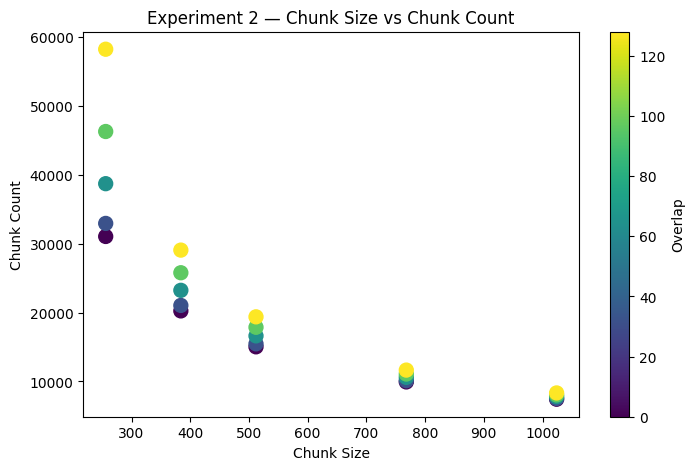

In [25]:
# ==== 시각화 2-1: Scatter ====
plt.figure(figsize=(8,5))
sc = plt.scatter(df2["chunk_size"], df2["chunk_count"], s=100, c=df2["overlap"], cmap="viridis")
cbar = plt.colorbar(sc)
cbar.set_label("Overlap")
plt.xlabel("Chunk Size")
plt.ylabel("Chunk Count")
plt.title("Experiment 2 — Chunk Size vs Chunk Count")
plt.show()

# 실험 비교하기

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 실험 1 / 2 결과 불러오기
df1 = pd.read_csv("data/interim/chunk_exp_300_1000.csv")
df2 = pd.read_csv("data/interim/chunk_exp_256_1024.csv")

# 실험 구분 열 추가
df1["experiment"] = "Exp 1 (300-1000)"
df2["experiment"] = "Exp 2 (256-1024)"
df_all = pd.concat([df1, df2], ignore_index=True)

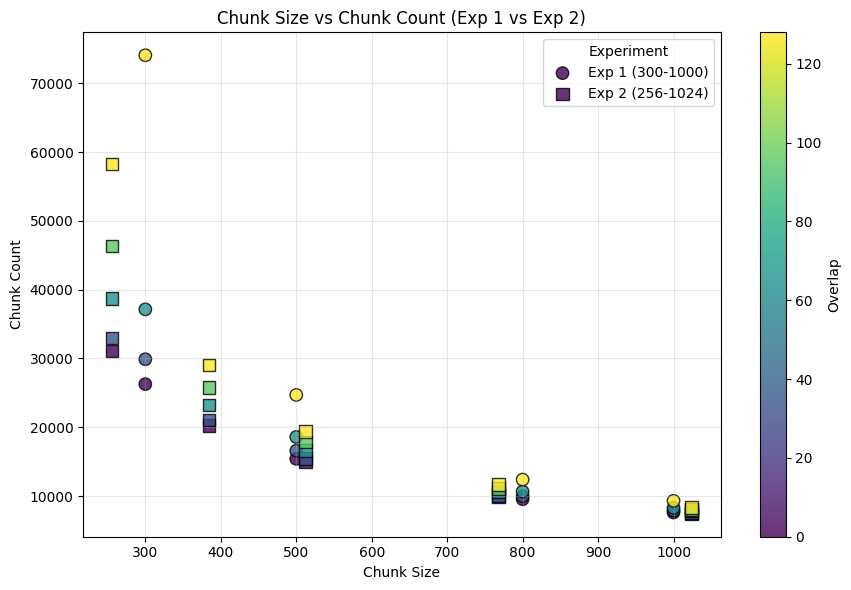

In [35]:
plt.figure(figsize=(9,6))

# KeyError 방지: unique 값 기준으로 자동 설정
unique_exps = df_all["experiment"].unique()
markers = {exp: m for exp, m in zip(unique_exps, ["o", "s", "^", "D"])}

for exp, group in df_all.groupby("experiment"):
    sc = plt.scatter(
        group["chunk_size"], group["chunk_count"],
        c=group["overlap"], cmap="viridis", s=80,
        marker=markers.get(exp, "o"), label=exp, alpha=0.8, edgecolor="k"
    )

plt.colorbar(sc, label="Overlap")
plt.xlabel("Chunk Size")
plt.ylabel("Chunk Count")
plt.title("Chunk Size vs Chunk Count (Exp 1 vs Exp 2)")
plt.legend(title="Experiment")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

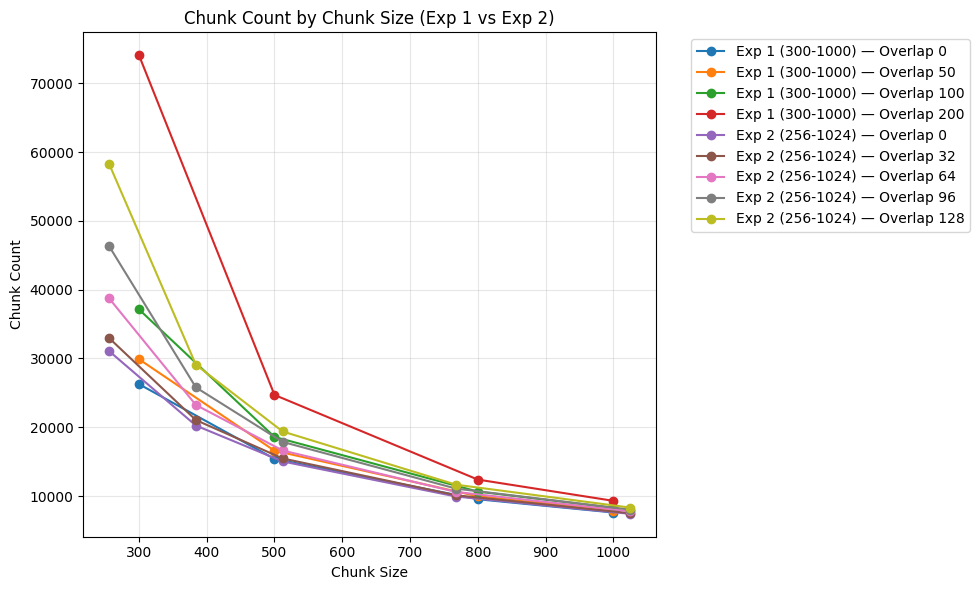

In [36]:
plt.figure(figsize=(10,6))

# 실험별 라인 그리기
for exp, group in df_all.groupby("experiment"):
    for ov in sorted(group["overlap"].unique()):
        sub = group[group["overlap"] == ov]
        plt.plot(
            sub["chunk_size"], sub["chunk_count"],
            marker="o", label=f"{exp} — Overlap {ov}"
        )

plt.xlabel("Chunk Size")
plt.ylabel("Chunk Count")
plt.title("Chunk Count by Chunk Size (Exp 1 vs Exp 2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
